<a href="https://colab.research.google.com/github/Gauthampharish/Facial_image_recognition/blob/main/Facialrecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle


In [4]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download apollo2506/facial-recognition-dataset

 92% 55.0M/59.7M [00:00<00:00, 82.7MB/s]
100% 59.7M/59.7M [00:00<00:00, 73.8MB/s]


In [8]:
! mkdir train

In [9]:
! unzip facial-recognition-dataset.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/Training/Training/Sad/Sad-370.jpg  
  inflating: train/Training/Training/Sad/Sad-3700.jpg  
  inflating: train/Training/Training/Sad/Sad-3701.jpg  
  inflating: train/Training/Training/Sad/Sad-3702.jpg  
  inflating: train/Training/Training/Sad/Sad-3703.jpg  
  inflating: train/Training/Training/Sad/Sad-3704.jpg  
  inflating: train/Training/Training/Sad/Sad-3705.jpg  
  inflating: train/Training/Training/Sad/Sad-3706.jpg  
  inflating: train/Training/Training/Sad/Sad-3707.jpg  
  inflating: train/Training/Training/Sad/Sad-3708.jpg  
  inflating: train/Training/Training/Sad/Sad-3709.jpg  
  inflating: train/Training/Training/Sad/Sad-371.jpg  
  inflating: train/Training/Training/Sad/Sad-3710.jpg  
  inflating: train/Training/Training/Sad/Sad-3711.jpg  
  inflating: train/Training/Training/Sad/Sad-3712.jpg  
  inflating: train/Training/Training/Sad/Sad-3713.jpg  
  inflating: train/Training/Training/Sad/Sad-3714.jpg  

In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random

from tensorflow import keras
from keras import layers
from keras import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3

In [11]:
# data preparation

train_dir = '/content/train/Training/Training'
test_dir = '/content/train/Testing/Testing'

train_angry_dir = '/content/train/Training/Training/Angry'
train_fear_dir = '/content/train/Training/Training/Fear'
train_happy_dir = '/content/train/Training/Training/Happy'
train_neutral_dir = '/content/train/Training/Training/Neutral'
train_sad_dir = '/content/train/Training/Training/Sad'
train_surprise_dir = '/content/train/Training/Training/Suprise'

test_angry_dir = '/content/train/Testing/Testing/Angry'
test_fear_dir = '/content/train/Testing/Testing/Fear'
test_happy_dir = '/content/train/Testing/Testing/Happy'
test_neural_dir = '/content/train/Testing/Testing/Neutral'
test_sad_dir = '/content/train/Testing/Testing/Sad'
test_surprise_dir = '/content/train/Testing/Testing/Suprise'

dir_list = [train_angry_dir, train_fear_dir, train_happy_dir,
           train_neutral_dir, train_sad_dir, train_surprise_dir,
           test_angry_dir, test_fear_dir, test_happy_dir,
           test_neural_dir, test_sad_dir, test_surprise_dir]

In [12]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=64,
                                                   class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(test_dir,
                                                             target_size=(150,150),
                                                             batch_size=62,
                                                             class_mode='categorical')

Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


In [13]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                 restore_best_weights=True)

In [14]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [15]:
# train the model

history = model.fit(train_generator,
                   epochs=10,
                   verbose=1,
                   validation_data=validation_generator,
                   callbacks=early_stopping_cb)

Epoch 1/10
442/442 [==============================] - 876s 2s/step - loss: 1.7471 - accuracy: 0.2539 - val_loss: 1.7410 - val_accuracy: 0.2706
Epoch 2/10
442/442 [==============================] - 883s 2s/step - loss: 1.7239 - accuracy: 0.2626 - val_loss: 1.6728 - val_accuracy: 0.3038
Epoch 3/10
442/442 [==============================] - 907s 2s/step - loss: 1.6814 - accuracy: 0.2928 - val_loss: 1.6427 - val_accuracy: 0.3301
Epoch 4/10
442/442 [==============================] - 914s 2s/step - loss: 1.6320 - accuracy: 0.3232 - val_loss: 1.5084 - val_accuracy: 0.4050
Epoch 5/10
442/442 [==============================] - 911s 2s/step - loss: 1.5722 - accuracy: 0.3582 - val_loss: 1.4470 - val_accuracy: 0.4305
Epoch 6/10
442/442 [==============================] - 903s 2s/step - loss: 1.5171 - accuracy: 0.3837 - val_loss: 1.3657 - val_accuracy: 0.4578
Epoch 7/10
442/442 [==============================] - 889s 2s/step - loss: 1.4715 - accuracy: 0.4094 - val_loss: 1.3093 - val_accuracy: 0.4815

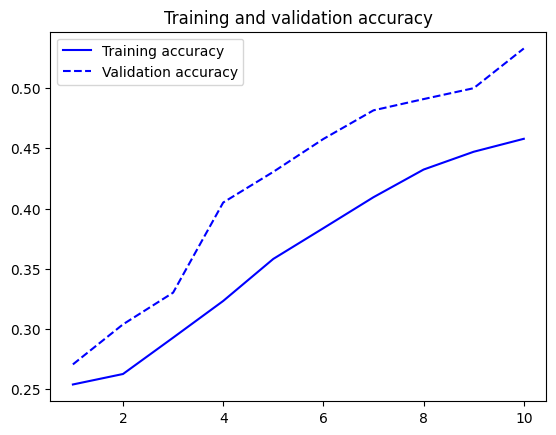

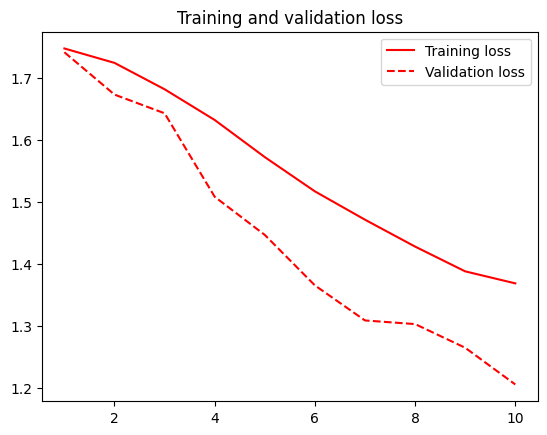

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# accuracy

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'b--', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# loss

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()